c:\Users\nly99857\OneDrive - Philips\SW Projects\PyCatan\notebooks\../src\Py_Catan_AI\py_catan_game.py:212: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Original action: 87, executed action: 87
The active player is Marvin. The original proposed action was: Marvin builds a
village at node 14. The action was executed as proposed.  Before executing the
action, the scores were: Marvin has 0 victory points, Hall 9000 has 0 victory
points, Miss Minutes has 0 victory points, C-3PO has 0 victory points. After the
move Marvin's score has changed from 0 to 1.


Original action: 21, executed action: 21
The active player is Marvin. The original proposed action was: Marvin constructs
a road at edge 20. The action was executed as proposed. Marvin's street length
has increased to 1, but this player still does not have the longest street.
Before executing the action, the scores were: Marvin has 1 victory points, Hall
9000 has 0 victory points, Miss Minutes has 0 victory points, C-3PO has 0
victory points.


Original action: 90, executed action: 90
The active player is Hall 9000. The original proposed action was: Hall 9000
builds a village at node 17. 

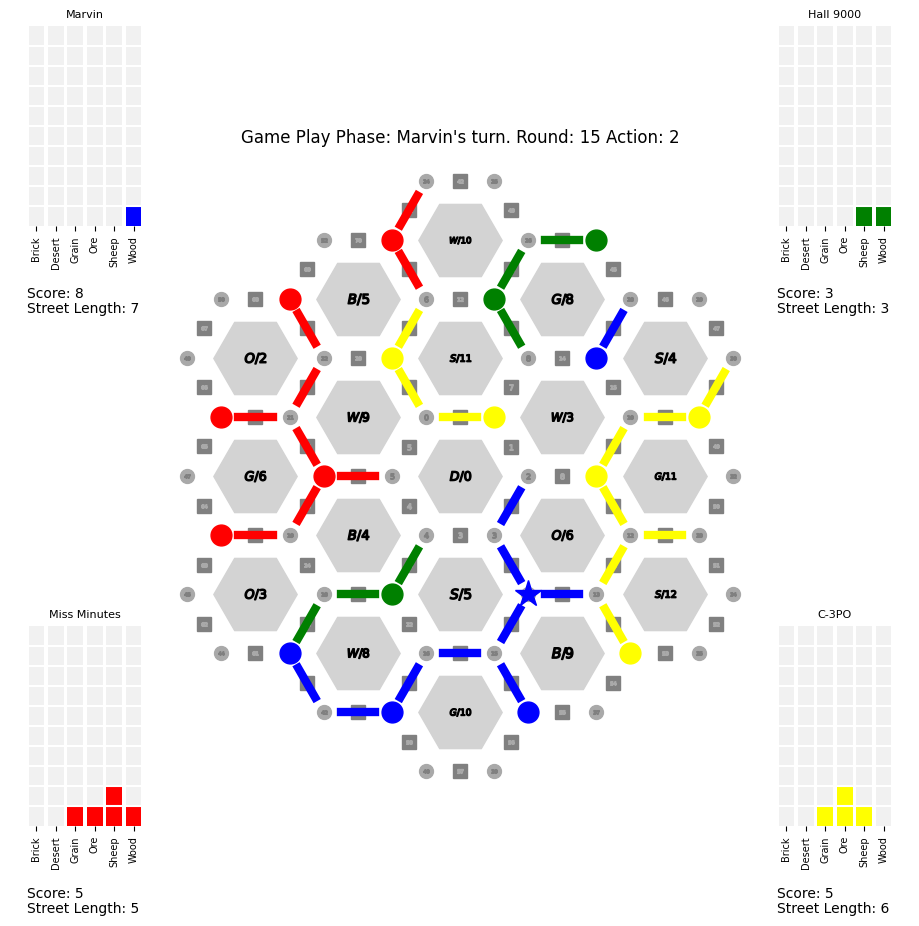

In [1]:
import sys
import os
import numpy as np
sys.path.append("../src")
from Py_Catan_AI.default_structure import default_players
from Py_Catan_AI.game_log import victory_points_from_game_log, rounds_from_game_log
from Py_Catan_AI.py_catan_game import PyCatanGame
from Py_Catan_AI.model_based_catan_player import ModelBasedCatanPlayer
from Py_Catan_AI.rl_model_based_catan_player import RLModelBasedCatanPlayer
from Py_Catan_AI.rl_game_log import RLReplayBuffer
from Py_Catan_AI.py_catan_tournament import Tournament
from Py_Catan_AI.rl_tournament import RLTournament
from Py_Catan_AI.rl_decision_model import RLDecisionModel
from Py_Catan_AI.default_structure import default_structure
from Py_Catan_AI.ppo_trainer import PPOTrainer
from Py_Catan_AI.plotting_utils import video_from_log
from Py_Catan_AI.openai_interface_multiagent import add_multiagent_comments_to_game_log
import tensorflow as tf

game  = PyCatanGame(max_rounds=51, victory_points_to_win=8)
players = default_players.copy()
game_log = game.play_catan_game(players = players)
game.plot_game_position(entry_index=-1)
import textwrap
for index, row in game_log.log.iterrows():
    print(f"Original action: {row['proposed_action_index']}, executed action: {row['action_index_to_execute']}")
    message  = row['message']
    print(textwrap.fill(message, width=80))
    print("\n" + "="*50 + "\n")


game_log.log = game_log.log.tail(25)
game_log_with_comments = add_multiagent_comments_to_game_log(game_log) 

for index, row in game_log.log.iterrows():
    print(f"Original action: {row['proposed_action_index']}, executed action: {row['action_index_to_execute']}")
    message  = row['message']
    print(textwrap.fill(message, width=80))
    comments = row['comments']
    for player, comment in comments.items():
        print(f"{player} comments:")
        print(textwrap.fill(comment, width=80))
    print("\n" + "="*50 + "\n")

video_from_log(game_log = game_log, filename="example_game_log.mp4")